In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import interpolate
import seaborn as sns
# Setup
%matplotlib inline
import matplotlib
params = {'font.size'     : 14,
          'figure.figsize':(15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,}
matplotlib.rcParams.update(params)
sns.set()


In [2]:
# thsi function returns the icecore density (average) from 18 collected samples from Greenland
#https://doi.org/10.5194/tc-10-1991-2016

def icecore_density(icecore_data):    
    lats = icecore_data['Latitude'].unique()
    checker = 0
    for lat in lats:
        print ('Latitude ',lat, 'Done')
        if checker == 0:
            density = icecore_data[icecore_data['Latitude'] == lat ]['Density [g/cm**3]'].to_numpy()
            checker = 1
        else:
            _new = icecore_data[icecore_data['Latitude'] == lat ]['Density [g/cm**3]'].to_numpy()

            if len(density) >= len(_new):
                density = density[:len(_new)] + _new
            else:
                density = density + _new[:len(density)]
    return density/len(lats)

In [3]:
icecore_data = pd.DataFrame(pd.read_csv('icecore_data.csv'))
ice_density = icecore_density(icecore_data)

satellite_data = pd.DataFrame(pd.read_csv('Daily_data.csv'))


Latitude  77.44433 Done
Latitude  77.3669 Done
Latitude  77.25429 Done
Latitude  77.1201 Done
Latitude  76.98195 Done
Latitude  76.84788 Done
Latitude  76.71337 Done
Latitude  76.52426 Done
Latitude  76.40034 Done
Latitude  76.32535 Done
Latitude  76.24889 Done
Latitude  76.1777 Done
Latitude  76.10455 Done
Latitude  76.01559 Done
Latitude  75.93539 Done
Latitude  75.85845 Done
Latitude  75.70614 Done
Latitude  75.62934 Done


In [4]:
temp = satellite_data['Ice_Surface_Temperature_Mean'].to_numpy()

In [5]:
print (ice_density.shape)
print (temp.shape)

(12466,)
(1462,)


# We need interpolation to have same amount of records for satellite data and icecore data

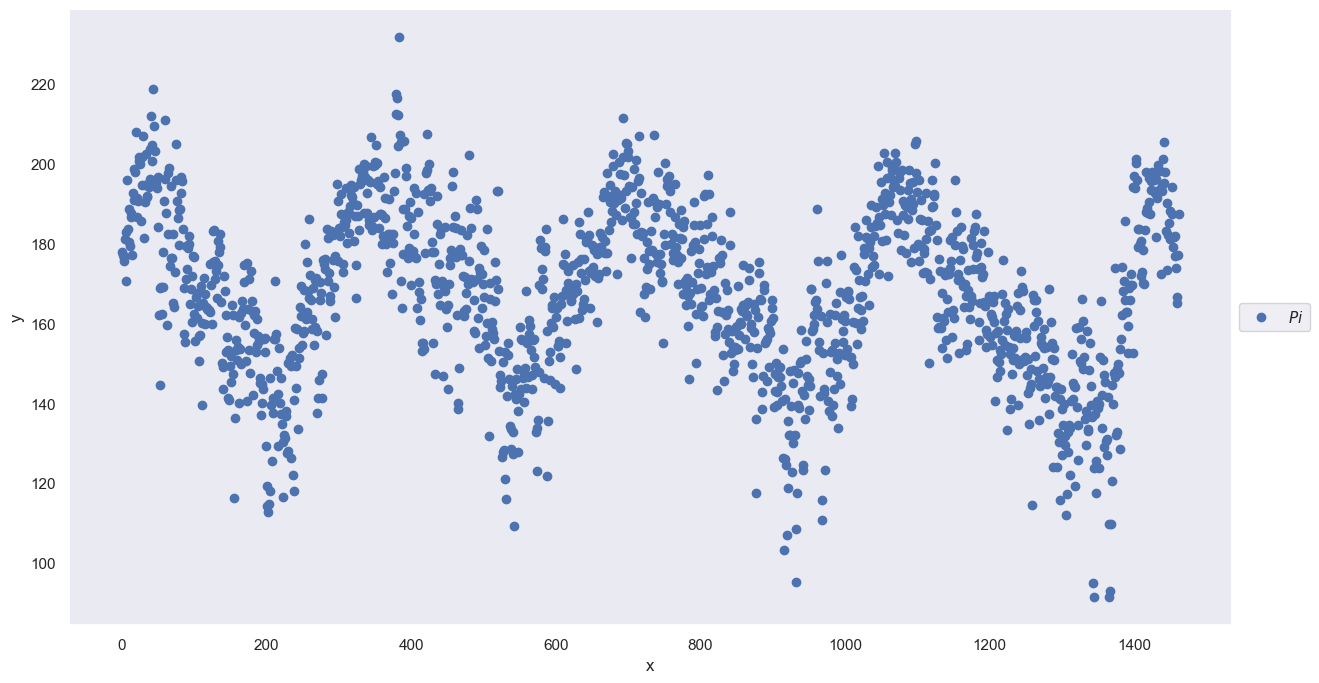

In [6]:
N = len(temp)
xmin, xmax = 0., len(temp)
xi = np.linspace(xmin, xmax, N)
yi = temp

plt.plot(xi,yi, 'o', label = "$Pi$")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

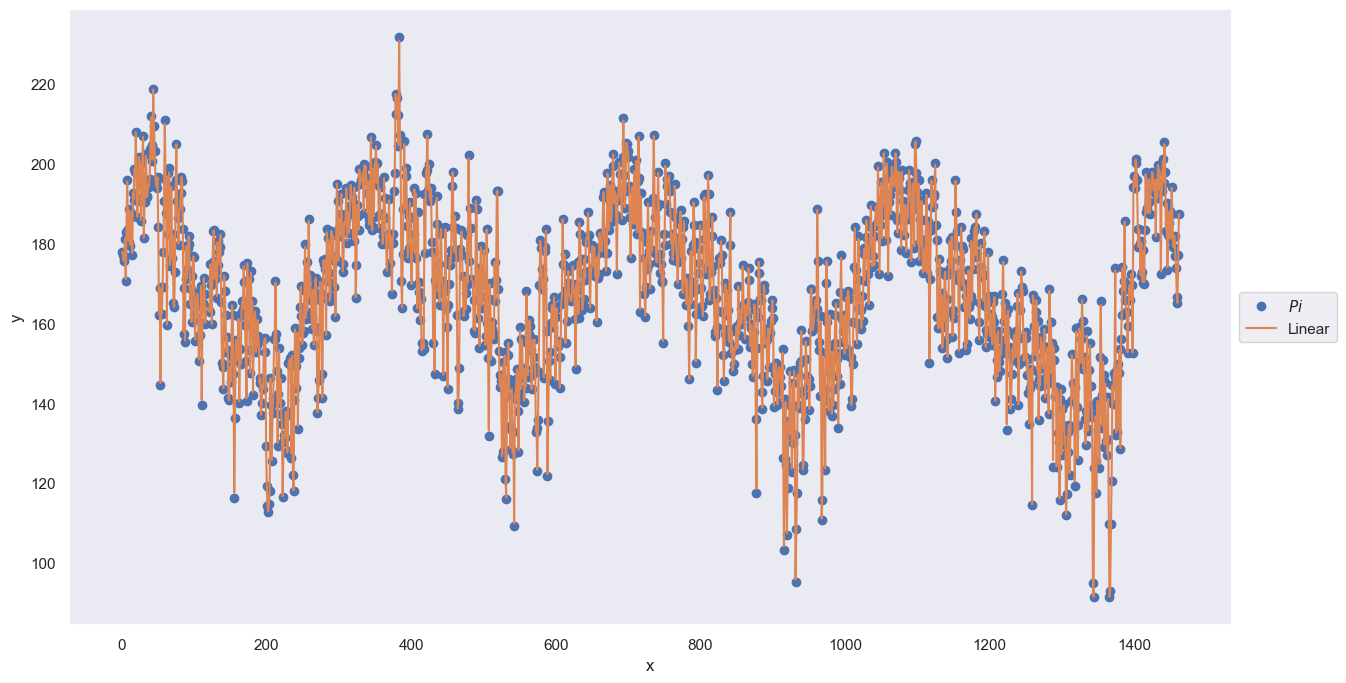

In [7]:

x = np.linspace(xmin, xmax, ice_density.shape[0])
interp = interpolate.interp1d(xi, yi, kind = "linear")
y_linear = interp(x)

new_temp = y_linear.copy()

plt.plot(xi,yi, 'o', label = "$Pi$")
plt.plot(x, y_linear, "-", label = "Linear")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
# now the icecore data and satellite data have the smae amount of rows
print(new_temp.shape)
print()

(12466,)



# Now there are same amount of records for both datasets. 

# Next step is to find correlation and distribution 

In [9]:
combined_data = pd.DataFrame()
combined_data['ice_temperature'] = new_temp
combined_data['ice_density'] = ice_density

In [10]:
combined_data.describe()

,ice_temperature,ice_density
count,12466.000000,12466.000000
mean,167.487299,0.325162
std,20.492786,0.020921
min,91.528566,0.263806
25%,153.716945,0.313408
50%,168.412578,0.324450
75%,182.977272,0.339488
max,230.820596,0.390444


In [11]:
# for comparing two datasets we need to scale them down 
scaler = MinMaxScaler()
scaler.fit(combined_data)
normdata = pd.DataFrame(scaler.transform(combined_data.values), index=combined_data.index, columns=combined_data.columns)

C:\Users\Fabagh001\Anaconda3\envs\FARAMARZ\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [12]:
normdata.describe()

,ice_temperature,ice_density
count,12466.000000,12466.000000
mean,0.545320,0.484498
std,0.147121,0.165203
min,0.000000,0.000000
25%,0.446460,0.391687
50%,0.551963,0.478877
75%,0.656525,0.597620
max,1.000000,1.000000


C:\Users\Fabagh001\Anaconda3\envs\FARAMARZ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fabagh001\Anaconda3\envs\FARAMARZ\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


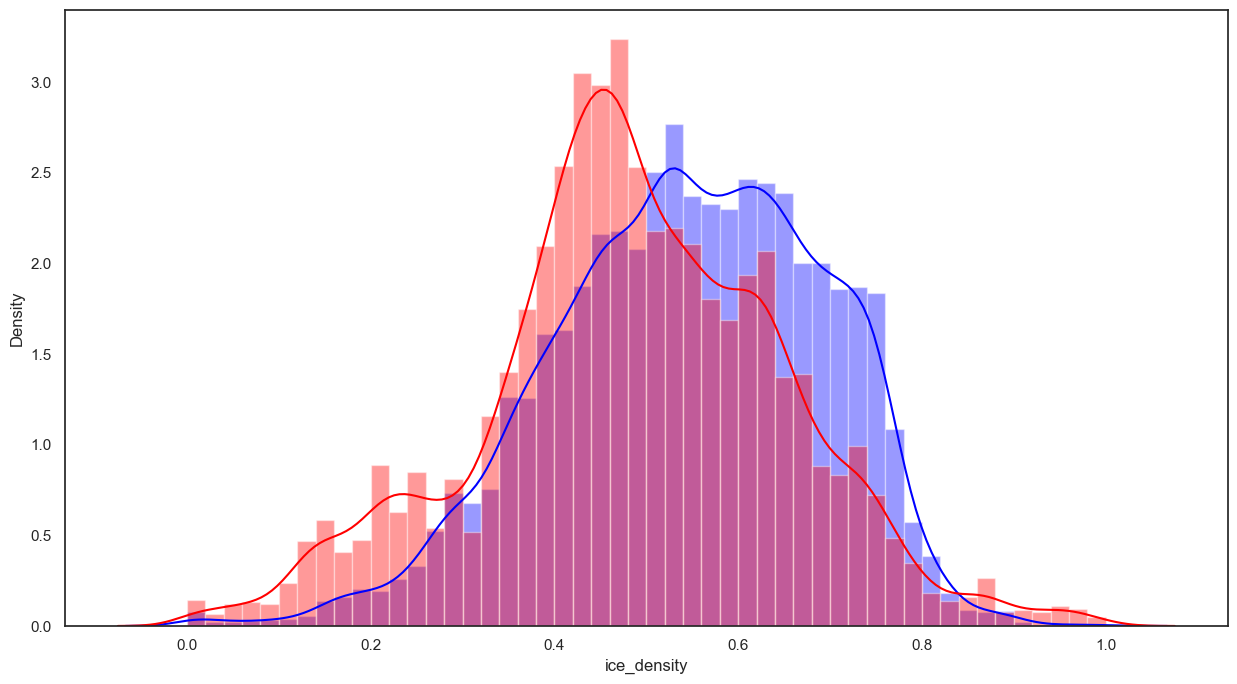

In [13]:
sns.set_style("white")
ax = sns.distplot(normdata.ice_temperature, color='blue')
ax = sns.distplot(normdata.ice_density, color='red')
plt.rcParams.update({'font.size': 14})

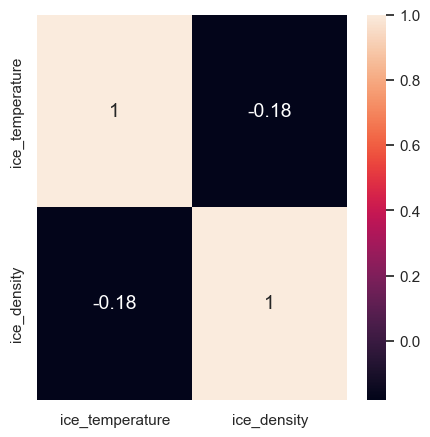

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(5,5))
cor = normdata.corr()
sns.heatmap(cor, annot=True)
plt.show()

<AxesSubplot:xlabel='day', ylabel='ice_temperature'>

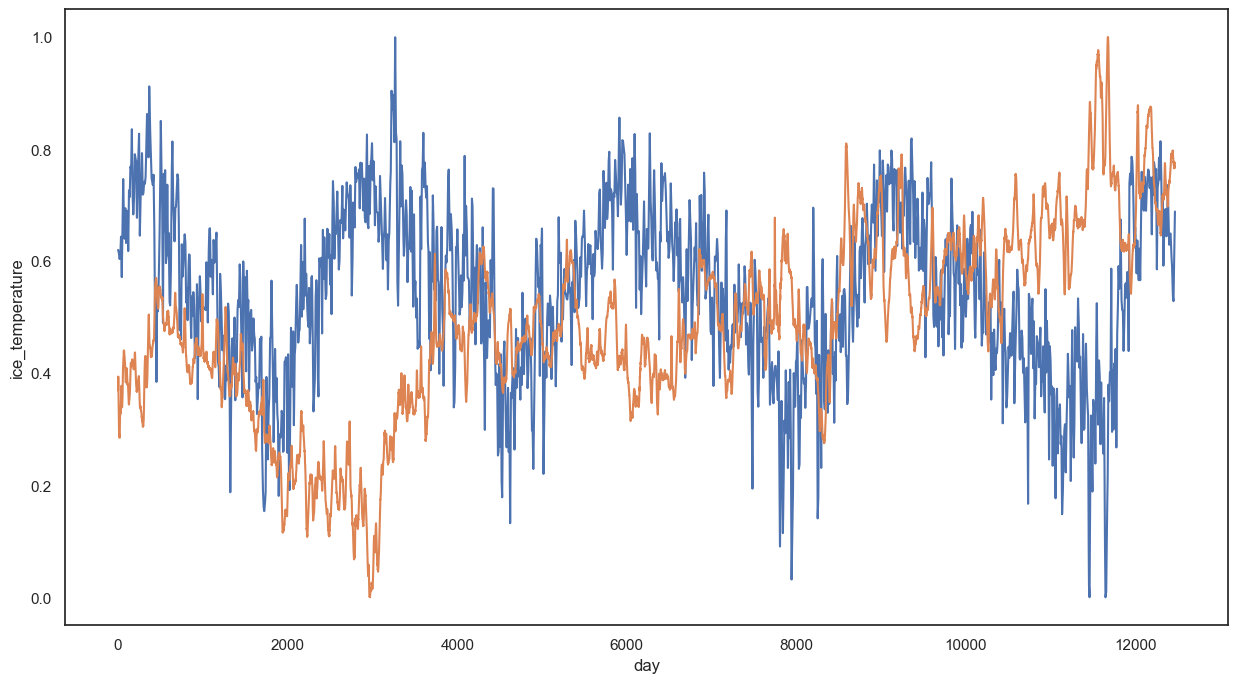

In [16]:
normdata['day'] = list(range(normdata.shape[0]))
sns.lineplot(data=normdata, x='day', y="ice_temperature")
sns.lineplot(data=normdata, x='day', y="ice_density")